In [1]:
from pyEmceeFit import *

In [2]:
sampler,pos,prob,state,flat_samples = main(True)

running with 4 threads


  0%|          | 0/1000 [00:00<?, ?it/s]/home/kirk/anaconda3/lib/python3.7/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  2%|▏         | 17/1000 [00:00<00:06, 162.49it/s]

running burn-in


  0%|          | 20/10000 [00:00<00:51, 193.93it/s]

production run (n = 10000 iterations)


100%|██████████| 10000/10000 [00:52<00:00, 192.08it/s]


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import sys,math

font = {'family' : 'DejaVu Serif',
    'weight' : 'normal',
    'size'   : 16}
plt.rc('font', **font) #set all plot attribute defaults

def pltFormatter(fig,axList,**kwargs):
    for ax in axList:
        ax.minorticks_on()
        ax.grid(b=True,which="major",alpha=0.5)
        ax.grid(b=True,which="minor",alpha=0.3)
        legend=kwargs.get("legend")
        if legend != None:
            legend.get_frame().set_edgecolor('black') 

def trackPercent(place,totalLength,strLen): #percent output tracker
    percent = place/totalLength*100
    if math.floor(percent)==69:
        string="{:.2f} % complete -- nice".format(percent)
    else:
        string="{:.2f} % complete".format(percent)
    sys.stdout.write("\r") #this "moves the cursor" to the beginning of the I0 line
    sys.stdout.write(" "*strLen) #this "clears" whatever was on the line last time by writing whitespace
    sys.stdout.write("\r") #move the cursor back to the start again
    sys.stdout.write(string) #display the current percent we are at
    sys.stdout.flush() #flush finishes call to print() (this is like what's under the hood of print function)
    strLen=len(string) #return the new string length for next function call
    return strLen

In [4]:
 for θ in flat_samples[np.random.randint(len(flat_samples), size=10)]:
        print("i = {0:.2f}, rMin = {1:.2f}, MFac = {2:.2f}, rFac = {3:.2f}, f1 (sin^2) = {4:.2f}, f2 (cos^2) = {5:.2f}, f3 (sin*cos)= {6:.2f}".format(θ[0],θ[1],θ[2],θ[3],θ[4],θ[5],θ[6]))

i = 49.56, rMin = 1049.18, MFac = 0.57, rFac = 1.42, f1 (sin^2) = 0.40, f2 (cos^2) = 0.50, f3 (sin*cos)= 0.37
i = 39.89, rMin = 842.83, MFac = 1.17, rFac = 1.40, f1 (sin^2) = 0.58, f2 (cos^2) = 0.64, f3 (sin*cos)= 0.60
i = 44.78, rMin = 1042.18, MFac = 1.03, rFac = 1.15, f1 (sin^2) = 0.44, f2 (cos^2) = 0.39, f3 (sin*cos)= 0.49
i = 51.74, rMin = 890.41, MFac = 1.62, rFac = 1.45, f1 (sin^2) = 0.49, f2 (cos^2) = 0.47, f3 (sin*cos)= 0.42
i = 51.84, rMin = 880.10, MFac = 1.12, rFac = 0.98, f1 (sin^2) = 0.43, f2 (cos^2) = 0.42, f3 (sin*cos)= 0.75
i = 48.32, rMin = 873.75, MFac = 1.09, rFac = 1.55, f1 (sin^2) = 0.33, f2 (cos^2) = 0.44, f3 (sin*cos)= 0.59
i = 39.65, rMin = 1185.93, MFac = 1.05, rFac = 1.40, f1 (sin^2) = 0.53, f2 (cos^2) = 0.42, f3 (sin*cos)= 0.58
i = 39.89, rMin = 842.83, MFac = 1.17, rFac = 1.40, f1 (sin^2) = 0.58, f2 (cos^2) = 0.64, f3 (sin*cos)= 0.60
i = 48.32, rMin = 873.75, MFac = 1.09, rFac = 1.55, f1 (sin^2) = 0.33, f2 (cos^2) = 0.44, f3 (sin*cos)= 0.59
i = 30.30, rMin 

In [9]:
def plotParams(data,θList):
    λCen=2.172; ν = (data[0]-λCen)/λCen*3e5
    indx=[0,1,2,6,7,8,12,13,14,18,19,20]; oindx=[3,4,5,9,10,11,15,16,17,21,22,23]
    fig,axd = plt.subplot_mosaic([['a','b','c']],figsize=(24,6))
    ax1 = axd["a"]; ax2 = axd["b"]; ax3 = axd["c"]
    ax1.get_shared_x_axes().join(ax1,ax2); ax1.get_shared_x_axes().join(ax1,ax3)
    ax2.get_shared_y_axes().join(ax2,ax3); ax3.set_yticklabels([])
    dodgerBlue=(.12,0.56,1.00)
    ax1.errorbar(ν,data[3],yerr=data[6],marker="o",ms=3,label="3C 273",markerfacecolor=dodgerBlue,markeredgecolor=dodgerBlue,linewidth=0,elinewidth=0.5,capsize=1.5,capthick=0.5,color='k')
    ax2.errorbar(ν,np.mean(np.array(data[4])[indx],axis=0),yerr=ν*0+0.07,label="3C 273",marker="o",ms=3,markerfacecolor=dodgerBlue,markeredgecolor=dodgerBlue,linewidth=0,elinewidth=0.5,capsize=1.5,capthick=0.5,color='k')
    ax3.errorbar(ν,np.mean(np.array(data[4])[oindx],axis=0),yerr=ν*0+0.07,label="3C 273",marker="o",ms=3,markerfacecolor=dodgerBlue,markeredgecolor=dodgerBlue,linewidth=0,elinewidth=0.5,capsize=1.5,capthick=0.5,color='k')
    ax1.fill_between(ν,data[3]-data[6],data[3]+data[6],color=dodgerBlue,alpha=0.5)
    ax2.fill_between(ν,np.mean(np.array(data[4])[indx],axis=0)-0.07,np.mean(np.array(data[4])[indx],axis=0)+0.07,color=dodgerBlue,alpha=0.5)
    ax3.fill_between(ν,np.mean(np.array(data[4])[oindx],axis=0)-0.07,np.mean(np.array(data[4])[indx],axis=0)+0.07,color=dodgerBlue,alpha=0.5)
    strLen = 0; place = 1; N = len(θList)
    for θ in θList:
        i,rMin,Mfac,rFac,f1,f2,f3 = θ
        line,phase,phaseo = getProfiles(ν,θ,data)
        label = "Disk wind (100 samples from MC chains)" if place == 1 else ""
        ax1.plot(ν,line,label=label,lw=2,c='crimson',alpha=0.1)
        ax2.plot(ν,phase,label=label,lw=2,c='crimson',alpha=0.1)
        ax3.plot(ν,phaseo,label=label,lw=2,c='crimson',alpha=0.1)
        strLen = trackPercent(place,N,strLen); place+=1
    ax1.set_title("Line profile comparison")
    ax2.set_title("Phase profile (mean on) comparison")
    ax3.set_title("Phase profile (mean off) comparison")
    ax2.set_xlabel("Velocity [km/s]")
    ax1.set_ylabel("Flux [fraction of max]")
    ax2.set_ylabel("Phase [deg]")
    l = ax2.legend(loc='upper left')
    pltFormatter(fig,[ax1,ax2,ax3],legend=l)
    fig.tight_layout()
    return fig,ax1,ax2,ax3

100.00 % complete       

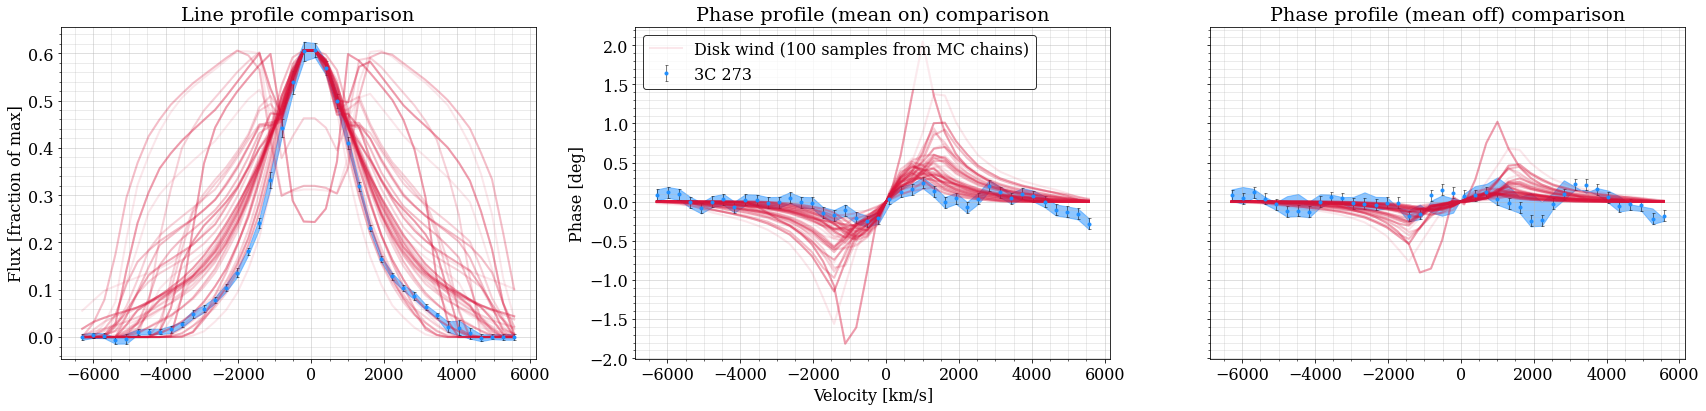

In [10]:
θList = flat_samples[np.random.randint(len(flat_samples),size=100)] #this looks like nonsense, investigate further
data = readPickle("3c273_juljanmarmay_append_gilles_specirf_wide_v6.p")
fig,ax1,ax2,ax3 = plotParams(data,θList)

In [11]:
from IPython.display import display, Math
labels=["i","rMin","MFac","rFac","f1","f2","f3"]
for i in range(len(labels)):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>